In [1]:
from aflow import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
result = search(batch_size=100
        ).filter(K.species == "O"
#        ).filter(K.spacegroup_orig == 221
#        ).filter(K.Pearson_symbol_orig == "cP5"
        ).filter(K.nspecies > 3
        ).select(
            K.compound, K.composition, K.species, K.natoms,
            K.spacegroup_orig, K.Pearson_symbol_orig,
            K.geometry, K.natoms, K.positions_fractional, K.positions_cartesian,
            K.enthalpy_atom, K.enthalpy_formation_atom
        )

In [ ]:
result = search(catalog="icsd", batch_size=100
        ).filter(K.spacegroup_orig == 221
        ).filter(K.Pearson_symbol_orig == "cP5"
        ).filter(K.nspecies == 3
        ).select(
            K.compound, K.composition, K.species, K.natoms,
            K.spacegroup_orig, K.Pearson_symbol_orig,
            K.geometry, K.natoms, K.positions_fractional, K.positions_cartesian,
            K.enthalpy_atom, K.enthalpy_formation_atom
        )

In [ ]:
max_N = result.max_N
max_N

In [ ]:
df = pd.DataFrame(columns=[
"auid", "aurl",
"compound", "composition", "species", "natoms",
"spacegroup", "pearson_symbol",
"geometry", "positions_fractional", "positions_cartesian",
"enthalpy_atom", "enthalpy_formation_atom"
])



counter = 1
for entry in result:
    # print(f"{counter}. Found compound", entry.compound, "with auid", entry.auid)
    print(f"Fetched {counter}/{max_N}", end="\r")
    row = {
        "auid": entry.auid,
        "aurl": entry.aurl,
        
        "compound": entry.compound,
        "composition": entry.composition,
        "species": entry.species,
        "natoms": entry.natoms,
        
        "spacegroup": entry.spacegroup_orig,
        "pearson_symbol": entry.Pearson_symbol_orig,
        
        "geometry": entry.geometry,
        "positions_fractional": entry.positions_fractional,
        "positions_cartesian": entry.positions_cartesian,
        
        "enthalpy_atom": entry.enthalpy_atom,
        "enthalpy_formation_atom": entry.enthalpy_formation_atom
    }
    df = df.append(row, ignore_index=True)
    counter += 1

print("Done.               ")

In [ ]:
df.shape

In [ ]:
df.to_pickle("data/all_221_cp5_3_species_oxides.pkl")

In [ ]:
df.to_pickle("data/all_3_species_oxides.pkl")

In [ ]:
df.to_pickle("data/all_sup4_species_oxides.pkl")

In [14]:
df = pd.read_pickle("data/all_221_cp5_3_species_oxides.pkl")

In [35]:
df = pd.read_pickle("data/all_3_species_oxides.pkl")

In [104]:
df1 = pd.read_pickle("data/all_3_species_oxides.pkl")
df2 = pd.read_pickle("data/all_sup4_species_oxides.pkl")
df = df1.append(df2)

In [36]:
df = df.drop_duplicates("compound")

In [37]:
elements = np.unique(np.hstack(np.array(df.species)))
print(elements)
print(elements.shape)

['Ag' 'Al' 'As' 'Au' 'B' 'Ba' 'Be' 'Bi' 'Br' 'C' 'Ca' 'Cd' 'Ce' 'Cl' 'Co'
 'Cr' 'Cs' 'Cu' 'Dy' 'Er' 'Eu' 'F' 'Fe' 'Ga' 'Gd' 'Ge' 'H' 'Hf' 'Hg' 'Ho'
 'I' 'In' 'Ir' 'K' 'La' 'Li' 'Lu' 'Mg' 'Mn' 'Mo' 'N' 'Na' 'Nb' 'Nd' 'Ni'
 'O' 'Os' 'P' 'Pa' 'Pb' 'Pd' 'Pr' 'Pt' 'Pu' 'Rb' 'Re' 'Rh' 'Ru' 'S' 'Sb'
 'Sc' 'Se' 'Si' 'Sn' 'Sr' 'Ta' 'Tb' 'Tc' 'Te' 'Th' 'Ti' 'Tl' 'Tm' 'U' 'V'
 'W' 'Xe' 'Y' 'Yb' 'Zn' 'Zr']
(81,)


In [38]:
elem_counts = pd.Series(np.hstack(np.array(df.species))).value_counts()
elem_counts

O     5456
P      300
V      280
Na     262
K      260
      ... 
Th      15
Lu      14
Tm       4
Pu       4
Pa       2
Length: 81, dtype: int64

In [39]:
limit = 50

In [40]:
elem_counts[elem_counts < limit].sum()

219

In [41]:
elem_counts[elem_counts < limit].count()

9

In [42]:
low_freq = elem_counts[elem_counts < limit].index.values
low_freq

array(['Tb', 'Dy', 'Ho', 'Yb', 'Th', 'Lu', 'Tm', 'Pu', 'Pa'], dtype=object)

In [43]:
low_freq_mask = df.species.apply(lambda s: len(np.setdiff1d(s, low_freq)) < len(s))

In [44]:
np.sum(low_freq_mask)

219

In [45]:
(elem_counts >= limit).count()

81

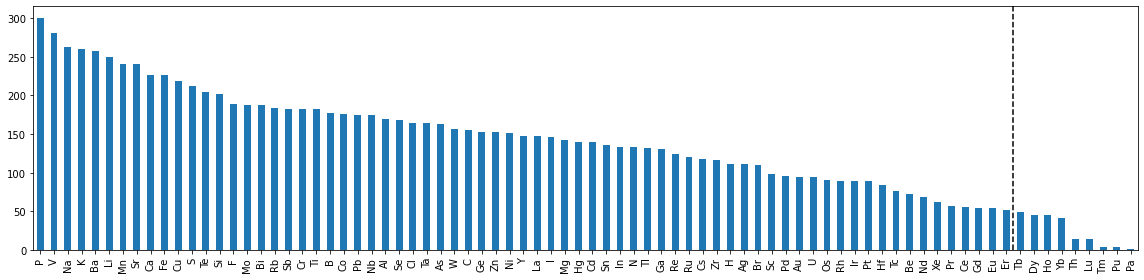

In [46]:
elem_counts[1:].plot.bar(figsize=(16,4))
plt.axvline(x=(elem_counts >= limit).sum() - 1.5, color="black", linestyle="--")
plt.tight_layout()
#plt.savefig("figs/all_221_cp5_3_species_oxides_elements.pdf")
plt.savefig("figs/all_3_species_oxides_elements.pdf")

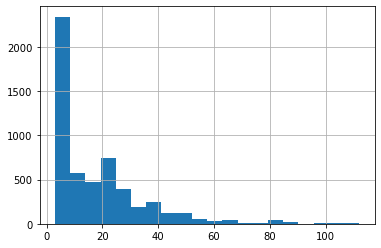

In [47]:
df.natoms.hist(bins=20)

In [48]:
np.sum(df.natoms > 75)

103

In [49]:
df_filtered = df[~low_freq_mask]
df_filtered.shape

(5237, 13)

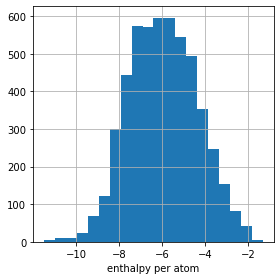

In [50]:
df_filtered.enthalpy_atom.hist(bins=20,figsize=(4,4))
plt.xlabel("enthalpy per atom")
plt.tight_layout()
##plt.savefig("figs/all_221_cp5_3_species_oxides_enthalpy.pdf")
plt.savefig("figs/all_3_species_oxides_enthalpy.pdf")